<a href="https://colab.research.google.com/github/lyricabdulrasheed/Week-Two-Worksheet/blob/main/Workbook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Replace 'your_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('Biomass Gasification Dataset (1).xlsx')

# Print the first few rows of the DataFrame
print(df.head())

          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type  \
0               1             1  ...    30   5.0    Batch              0   
1               1             1  ...    60   5.0    Batch              0   
2               1             1  ...    30  15.0    Batch              0   
3               1             1  ...    60  15.0    Batch              0   
4               1             1  ...    45  10.0    Batch              0   

   Catalyst Concentration  CO2 mole fraction  H2 mole fraction  \
0                     0.0              92.37              1.54   
1       

In [ ]:
# Get the number of rows and columns
num_rows, num_cols = df.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 244
Number of columns: 25


In [ ]:
# Identify numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("\nNumeric columns:", numeric_columns)
print("\nCategorical columns:", categorical_columns)


Numeric columns: Index(['C', 'H', 'N', 'S', 'O', 'ASH', 'C-H Aromatics ', 'C-H  Alkanes',
       'C-O ', 'C=C ', 'C=O ', 'O-H ', 'Temp', 'Time', 'BC',
       'Catalyst Concentration', 'CO2 mole fraction', 'H2 mole fraction',
       'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction'],
      dtype='object')

Categorical columns: Index(['feed', 'Type of Feed', 'Reactor', 'Catalyst Type'], dtype='object')


In [ ]:
# Get data types of all columns
data_types = df.dtypes
print(data_types)

# Assuming you've checked data types
def impute_missing_values(df):
  # Impute numeric columns with mean
  numeric_cols = df.select_dtypes(include=['number']).columns
  df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

  # Handle categorical or string columns differently
  # (e.g., impute with mode or specific value)
  categorical_cols = df.select_dtypes(include=['object']).columns
  # ... (code for handling categorical columns)

  return df
# Impute missing values in the DataFrame
df = impute_missing_values(df.copy())  # Operate on a copy to avoid modifying original data

feed                       object
Type of Feed               object
C                         float64
H                         float64
N                         float64
S                         float64
O                         float64
ASH                       float64
C-H Aromatics               int64
C-H  Alkanes                int64
C-O                         int64
C=C                         int64
C=O                         int64
O-H                         int64
Temp                        int64
Time                        int64
BC                        float64
Reactor                    object
Catalyst Type              object
Catalyst Concentration    float64
CO2 mole fraction         float64
H2 mole fraction          float64
Hydrogen selectivity      float64
CO mole fraction          float64
CH4 mole fraction         float64
dtype: object


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values)


Number of missing values in each column:
feed                      0
Type of Feed              0
C                         0
H                         0
N                         0
S                         0
O                         0
ASH                       0
C-H Aromatics             0
C-H  Alkanes              0
C-O                       0
C=C                       0
C=O                       0
O-H                       0
Temp                      0
Time                      0
BC                        0
Reactor                   0
Catalyst Type             0
Catalyst Concentration    0
CO2 mole fraction         0
H2 mole fraction          0
Hydrogen selectivity      0
CO mole fraction          0
CH4 mole fraction         0
dtype: int64


In [ ]:
# Assuming 'Biomass_Type' is the column
biomass_feed_column = 'Type of Feed'

# Print unique feed types
feed_types = df[biomass_feed_column].unique()
print("Biomass Feed Types:")
print(feed_types)

# Print feed type counts
feed_counts = df[biomass_feed_column].value_counts()
print("Biomass Feed Counts:")
print(feed_counts)

Biomass Feed Types:
['Orange Peel' 'Banana Peel' 'Watermelon Peel' 'PET' 'wheat straw'
 'Crude Glycerol' 'Dunalila salina- CGLY 4%' 'Esperolina Plantis- CGLY 4%'
 'Chulorala Valgaris- CGLY 4%' 'Dunalila salina- Dionized Water'
 'Esperolina Plantis- Dionized Water' 'Chulorala Valgaris-Dionized Water'
 'Wood' 'Black Liquor' 'Black Liquor- Wood 3%' 'Black Liqour- Wood 5%'
 'Black Liquor- Wood 7%' 'Black Liquor- Wood 3%- Formic Acid'
 'Black Liquor- Wood 5%- Formic Acid' 'Black Liquor- Wood 7%- Formic Acid'
 'Distillition Waste water' 'Dairy Waste water based on Cheese'
 'Dairy Waste water based on Milk' 'Food Waste(Kitchen)']
Biomass Feed Counts:
Type of Feed
Distillition Waste water              36
PET                                   36
wheat straw                           28
Orange Peel                           24
Crude Glycerol                        22
Black Liquor                          17
Wood                                  17
Food Waste(Kitchen)                   13
Dairy W

Minimum temperature: 80
Maximum temperature: 400
Average temperature: 369.36475409836066


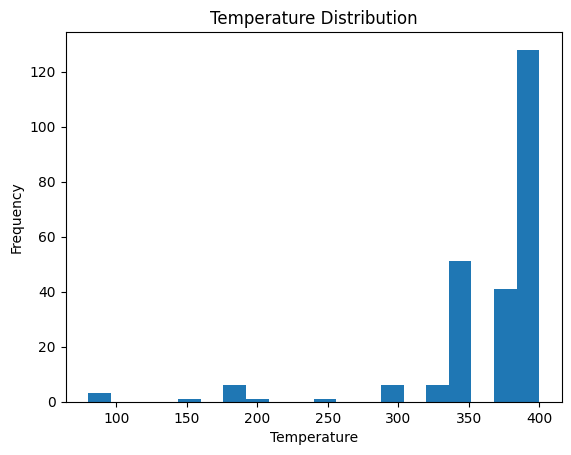

In [ ]:
# Identify the column containing temperature data (adjust based on your dataset)
temperature_column = 'Temperature'

# Extract temperature data
temperature_data = df[temperature_column]

# Calculate minimum, maximum, and average temperature
min_temp = temperature_data.min()
max_temp = temperature_data.max()
avg_temp = temperature_data.mean()

print("Minimum temperature:", min_temp)
print("Maximum temperature:", max_temp)
print("Average temperature:", avg_temp)

# Visualize temperature distribution (optional)
!pip install matplotlib
import matplotlib.pyplot as plt
plt.hist(temperature_data, bins=20)
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Assuming you have a DataFrame named 'df'
# Check for duplicate columns based on column names
duplicate_columns_by_name = df.columns.duplicated()

# Check for duplicate columns based on values
duplicate_columns_by_values = df.apply(lambda x: x.duplicated(), axis=1).all()

# Identify redundant columns
redundant_columns = df.loc[:, duplicate_columns_by_name | duplicate_columns_by_values].columns

# Print redundant columns
print("Redundant columns:")
print(redundant_columns)

Redundant columns:
Index(['C=O ', 'O-H '], dtype='object')


In [ ]:
# Identify redundant columns based on column names and values
duplicate_columns_by_name = df.columns.duplicated()
duplicate_columns_by_values = df.apply(lambda x: x.duplicated(), axis=1).all()
redundant_columns = df.loc[:, duplicate_columns_by_name | duplicate_columns_by_values].columns

# Remove redundant columns and create a new DataFrame
df_cleaned = df.drop(columns=redundant_columns, errors='ignore').copy()

# Print the cleaned DataFrame
print(df_cleaned)

            feed         Type of Feed      C     H     N    S      O  ASH  \
0    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4    Fruit Waste          Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
..           ...                  ...    ...   ...   ...  ...    ...  ...   
239        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
240        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
241        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
242        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   
243        Waste  Food Waste(Kitchen)  41.20  6.71  1.47  0.0  43.12  4.1   

     C-H Aromatics   C-H  Alkanes  ...  Time    BC  Reactor  Catalyst Type 

In [ ]:
import pandas as pd

# Ensure that 'grouped_data' has been defined and assigned a value before this line
# Example: Replace this with your actual grouped data
grouped_data = pd.DataFrame({'min': [1, 2], 'max': [3, 4]})  # Example DataFrame

ratio_ranges = grouped_data[['min', 'max']]

# Print the ranges in a table format
print("Ranges of C/H and O/H Ratios by Biomass Feed:")
print(ratio_ranges.to_markdown(index=False, numalign='left', stralign='left'))

Ranges of C/H and O/H Ratios by Biomass Feed:
| min   | max   |
|:------|:------|
| 1     | 3     |
| 2     | 4     |


In [ ]:
import pandas as pd

# Create a sample DataFrame (replace this with your actual data)
data = {'Type of Feed': ['Grass', 'Wood', 'Grass', 'Corn'],
        'Value': [10, 20, 15, 25]}
df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=['Type of Feed'])

# Print the modified DataFrame
print(df.head())

   Value  Type of Feed_Corn  Type of Feed_Grass  Type of Feed_Wood
0     10              False                True              False
1     20              False               False               True
2     15              False                True              False
3     25               True               False              False


In [ ]:
import pandas as pd

# Create a sample DataFrame (replace this with your actual data)
data = {'Type of Feed': ['Grass', 'Wood', 'Grass', 'Corn'],
        'Value': [10, 20, 15, 25]}
df = pd.DataFrame(data)

df = pd.get_dummies(df, columns=['Type of Feed'])

# Assuming your DataFrame is named 'df' and you one-hot encoded 'Type of Feed'
num_columns = len([col for col in df.columns if 'Type of Feed_' in col])
print("Number of columns after one-hot encoding:", num_columns)

# Define 'categorical_columns' with actual columns from df
categorical_columns = ['Value']  # Example: Replace with your actual categorical columns
df_encoded = pd.get_dummies(df,columns=categorical_columns, drop_first=True)

Number of columns after one-hot encoding: 3


In [ ]:
import pandas as pd
from scipy import stats

# Calculate z-scores for all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
df_zscores = df[numerical_cols].apply(stats.zscore)

# Find outliers (z-score > 3 or < -3)
outliers = (df_zscores > 3) | (df_zscores < -3)

# Display the outliers
print("Outliers in the data:")
print(df[outliers])

Outliers in the data:
   Value Type of Feed_Corn Type of Feed_Grass Type of Feed_Wood
0    NaN               NaN                NaN               NaN
1    NaN               NaN                NaN               NaN
2    NaN               NaN                NaN               NaN
3    NaN               NaN                NaN               NaN


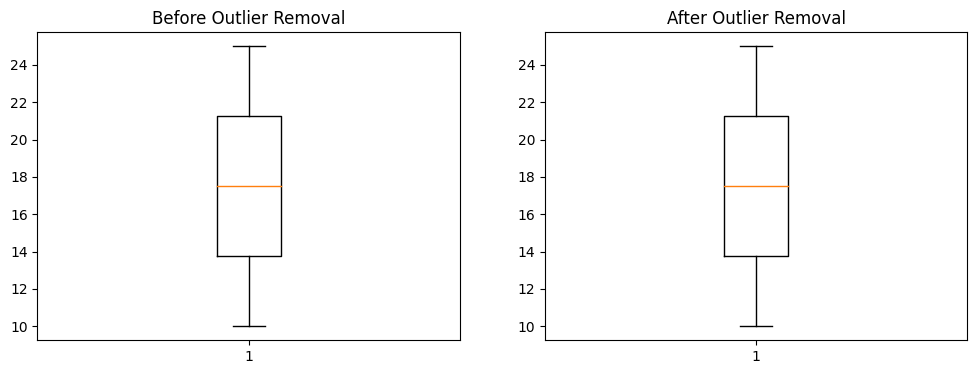

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df'
# Replace 'Value' with the actual column name from your DataFrame that contains outliers
column_name = 'Value'

# Calculate z-scores
z_scores = (df[column_name] - df[column_name].mean()) / df[column_name].std()

# Set a threshold for outlier detection
threshold = 3

# Identify outliers
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove outliers (optional)
df_cleaned = df[~outliers]

# Visualize data before and after outlier removal
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.boxplot(df[column_name])
plt.title("Before Outlier Removal")

plt.subplot(1, 2, 2)
plt.boxplot(df_cleaned[column_name])
plt.title("After Outlier Removal")

plt.show()

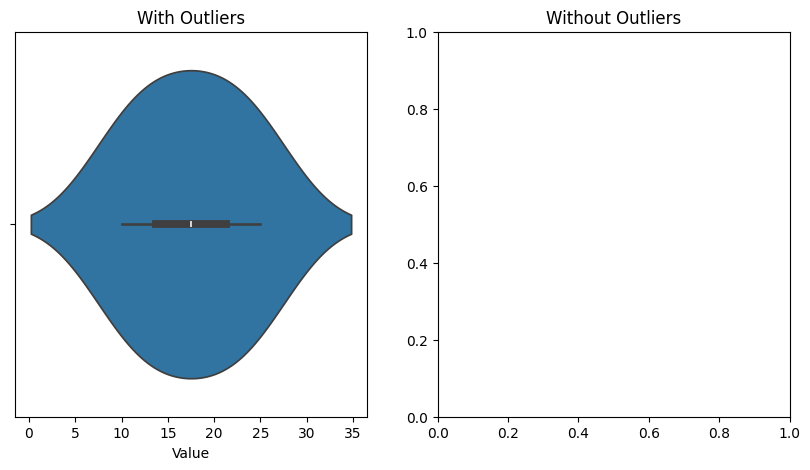

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and the column of interest is named 'Value'
data = df['Value'] # Changed 'data' to 'Value'

# Calculate IQR for outlier detection
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data < lower_bound) | (data > upper_bound)]

# Create violin plots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sns.violinplot(x=data, ax=axes[0])
axes[0].set_title('With Outliers')

sns.violinplot(x=data[~outliers], ax=axes[1])
axes[1].set_title('Without Outliers')

plt.show()

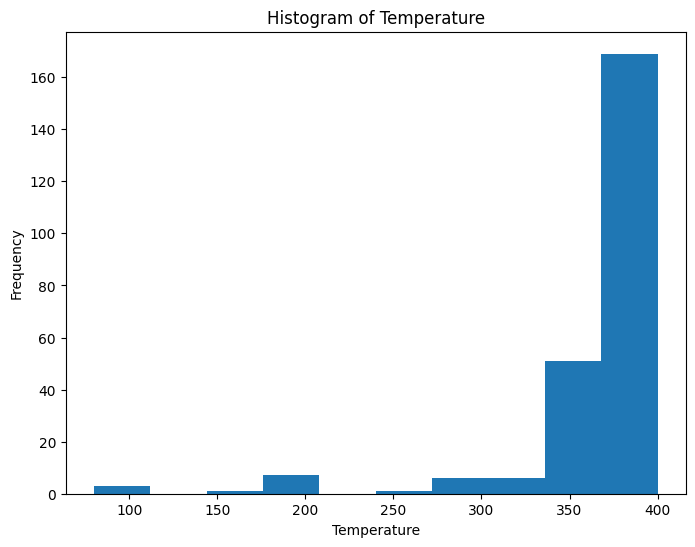

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file.xlsx' with the actual path to your Excel file
df = pd.read_excel('Biomass Gasification Dataset (1).xlsx')

# Select the temperature column (replace 'Temperature' with the actual column name)
temperature_data = df['Temp']

# Create the histogram
plt.figure(figsize=(8, 6))
plt.hist(temperature_data, bins=10)  # You can adjust the number of bins as needed
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.show()


Correlation coefficient: -0.3139426047465725


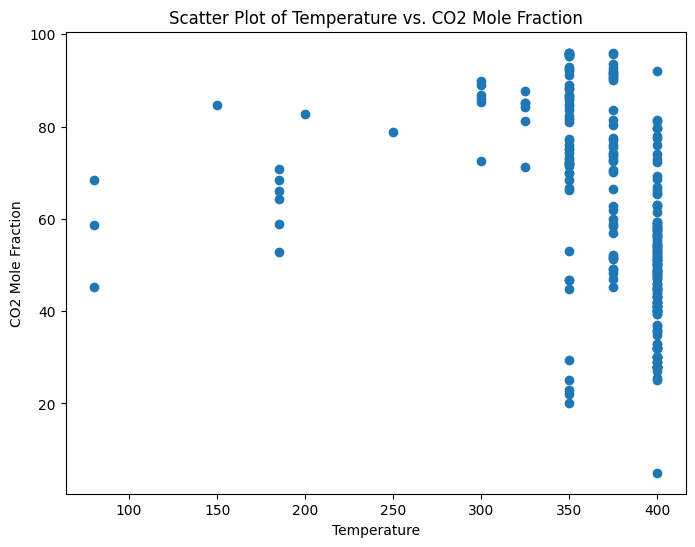

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from Excel (replace with your actual file name)
df = pd.read_excel('Biomass Gasification Dataset (1).xlsx')

# Select the temperature and CO2 columns (replace with actual column names)
temperature_data = df['Temp']
co2_data = df['CO2 mole fraction']

# Calculate the correlation coefficient
correlation = temperature_data.corr(co2_data)
print(f"Correlation coefficient: {correlation}")

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(temperature_data, co2_data)
plt.xlabel('Temperature')
plt.ylabel('CO2 Mole Fraction')
plt.title('Scatter Plot of Temperature vs. CO2 Mole Fraction')
plt.show()

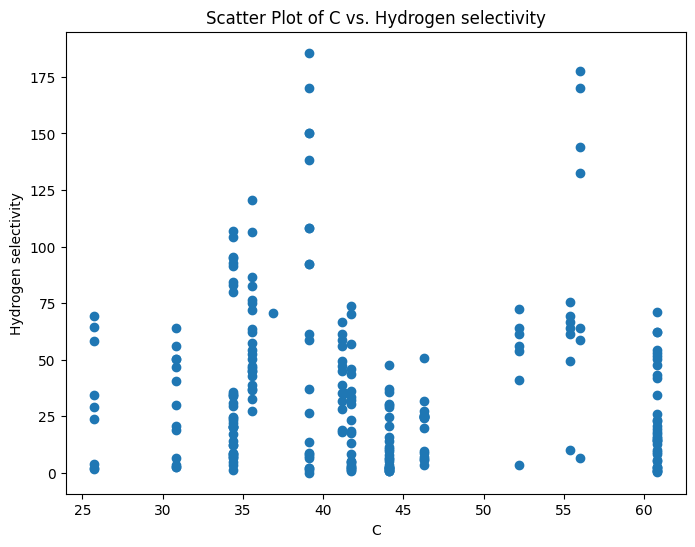

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from Excel
df = pd.read_excel('Biomass Gasification Dataset (1).xlsx')

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['C'], df['Hydrogen selectivity'])
plt.xlabel('C')
plt.ylabel('Hydrogen selectivity')
plt.title('Scatter Plot of C vs. Hydrogen selectivity')
plt.show()

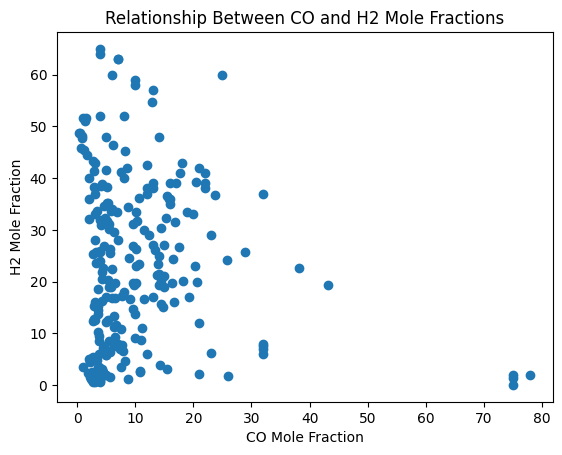

Correlation coefficient: -0.08622082716438756


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from Excel
df = pd.read_excel('Biomass Gasification Dataset (1).xlsx')

# Identify columns for CO and H2 mole fractions (adjust based on your dataset)
co_column = 'CO mole fraction' # Removed underscore from column name
h2_column = 'H2 mole fraction' # Removed underscore from column name

# Create a scatter plot
plt.scatter(df[co_column], df[h2_column])
plt.xlabel("CO Mole Fraction")
plt.ylabel("H2 Mole Fraction")
plt.title("Relationship Between CO and H2 Mole Fractions")
plt.show()

# Calculate correlation coefficient
correlation = df[co_column].corr(df[h2_column])
print("Correlation coefficient:", correlation)

In [ ]:
import pandas as pd

# Read the data from Excel
df = pd.read_excel('Biomass Gasification Dataset (1).xlsx')

# Define the target variables
target_columns = ['CO2 mole fraction', 'H2 mole fraction', 'Hydrogen selectivity', 'CO mole fraction', 'CH4 mole fraction'] # Changed 'Hydrogen Selectivity' to 'Hydrogen selectivity'

# Create features (X) by dropping the target columns
X = df.drop(target_columns, axis=1)

# Create target variables (Y)
Y = df[target_columns]

print("Features (X):")
print(X.head())

print("\nTarget Variables (Y):")
print(Y.head())

Features (X):
          feed Type of Feed      C     H     N    S      O  ASH  \
0  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
1  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
2  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
3  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   
4  Fruit Waste  Orange Peel  41.71  6.04  1.91  0.0  50.34  0.0   

   C-H Aromatics   C-H  Alkanes  C-O   C=C   C=O   O-H   Temp  Time    BC  \
0               1             1     1     1     1     1   350    30   5.0   
1               1             1     1     1     1     1   350    60   5.0   
2               1             1     1     1     1     1   350    30  15.0   
3               1             1     1     1     1     1   350    60  15.0   
4               1             1     1     1     1     1   350    45  10.0   

  Reactor Catalyst Type  Catalyst Concentration  
0   Batch             0                     0.0  
1   Batch           